In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import utils

C:\Users\msubr\Anaconda3\envs\bert\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("../data/UCF-crime-frames-descriptions-partitions.csv")

In [4]:
video_name = [f.split("_")[0] for f in data["frame"]]

In [5]:
data["vn"] = video_name

In [6]:
model = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [7]:
model.load_state_dict(torch.load("models/model_image_qformer_features.pt"))

<All keys matched successfully>

In [8]:
final = nn.Sequential(model, torch.nn.Softmax(dim = 1))

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
final.to(device)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=768, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
  (1): Softmax(dim=1)
)

In [16]:
utils.labels

{'Normal': 0,
 'Abuse': 1,
 'Arrest': 2,
 'Arson': 3,
 'Burglary': 4,
 'Explosion': 5,
 'Fighting': 6,
 'RoadAccidents': 7,
 'Shooting': 8,
 'Vandalism': 9}

In [10]:
video = data.loc[data["vn"] == "Vandalism046"]
print(video["partition"].head(1))

145556    test
Name: partition, dtype: object


In [11]:
path = "d:/data/UCF-crime/Anomaly-Videos-qformer-features"
video_feat, y = utils.get_data(video, path)

In [12]:
batch_size = 64
pred = utils.evaluate(video_feat, final, device, batch_size)

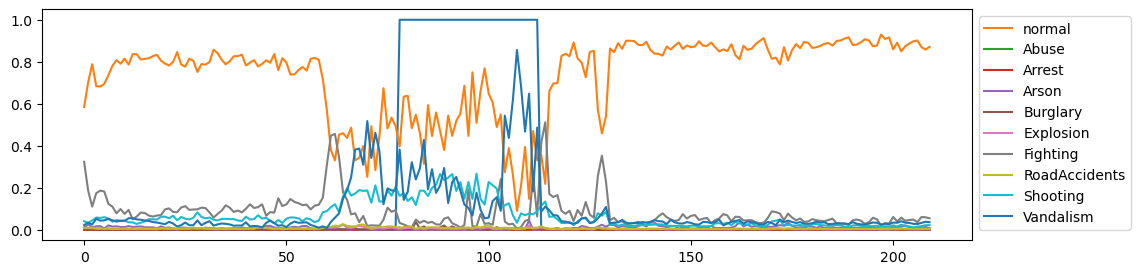

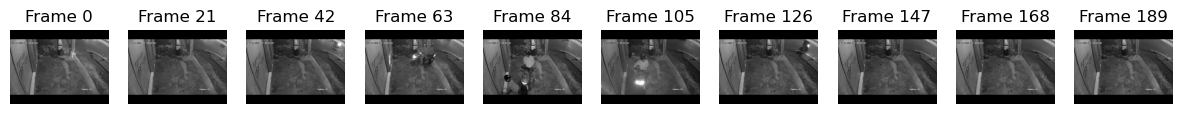

In [13]:
utils.plot_results(y/9, pred)
utils.show_frames(video, n=10)

In [14]:
video = data.loc[data["vn"] == "Abuse046"]
print(video["partition"].head(1))

18057    test
Name: partition, dtype: object


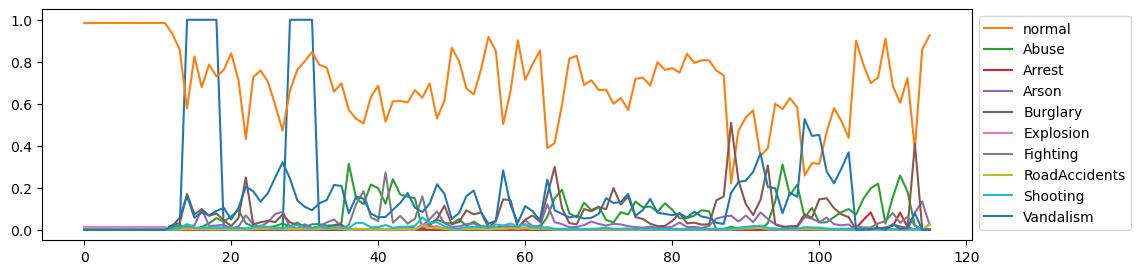

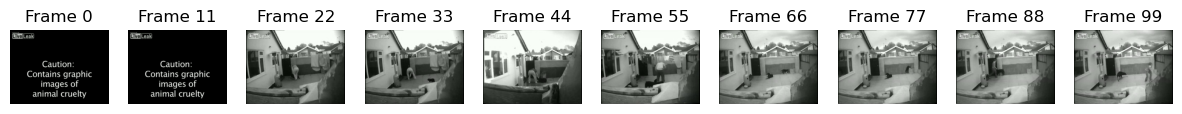

In [17]:
video_feat, y = utils.get_data(video, path)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/1, pred)
utils.show_frames(video, n=10)

In [24]:
video = data.loc[data["vn"] == "Arrest044"]
print(video["partition"].head(1))

46824    validation
Name: partition, dtype: object


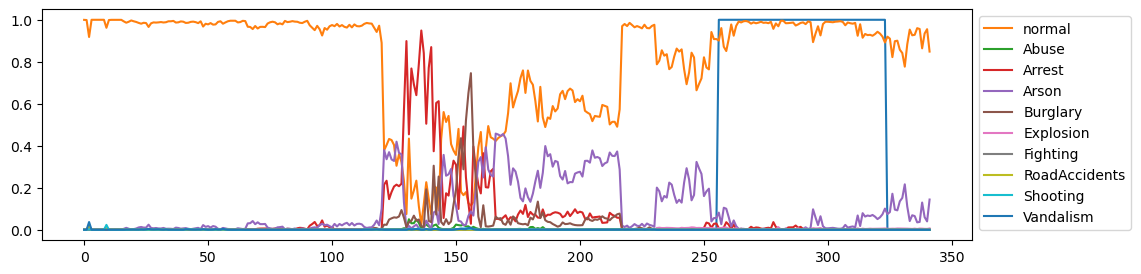

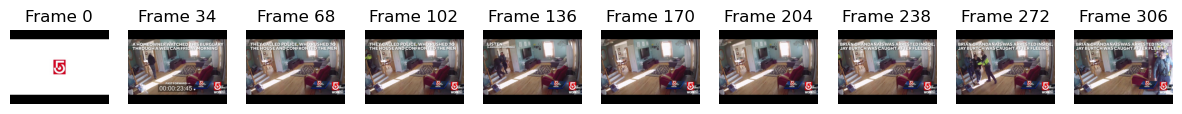

In [25]:
video_feat, y = utils.get_data(video, path)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/2, pred)
utils.show_frames(video, n=10)

In [26]:
video = data.loc[data["vn"] == "Fighting044"]
print(video["partition"].head(1))

167440    validation
Name: partition, dtype: object


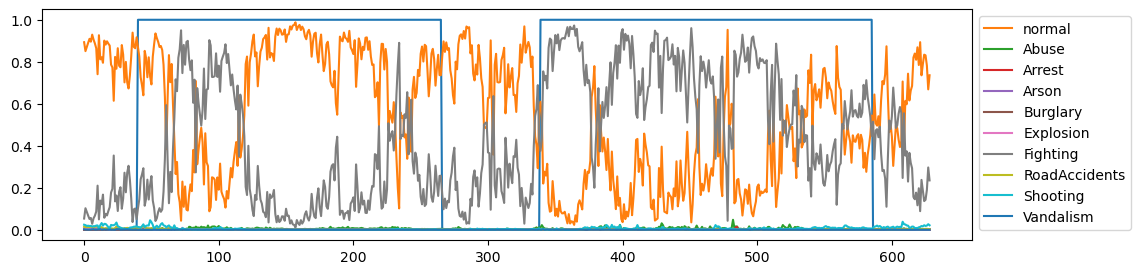

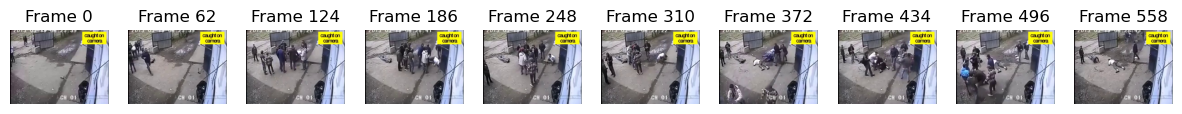

In [27]:
video_feat, y = utils.get_data(video, path)
pred = utils.evaluate(video_feat, final, device, batch_size)
utils.plot_results(y/6, pred)
utils.show_frames(video, n=10)